<a href="https://colab.research.google.com/github/deiveleal/Data/blob/main/mestrado/ft105/classificacao/ClassificationWithDecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Instala as bibliotecas da UCI, graphviz e pydotplus
# !pip install ucimlrepo
# !pip install graphviz
# !pip install pydotplus

#### Import das bibliotecas

In [44]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import tree
from six import StringIO
from IPython.display import Image
import pydotplus


#### Importa o conjunto de dados

In [39]:
# Importa o repositório do conjunto de dados
from ucimlrepo import fetch_ucirepo

# Realiza a busca dos dados
wine = fetch_ucirepo(id=109)

# Os dados são um dataframe pandas já separado em features e targets
X = wine.data.features
y = wine.data.targets

# Mostra o dataframe montado
df = pd.concat([X,y], axis=1)
df.head(7)

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,1


### Classificação com Árvore de Decisão

In [40]:
# Separa o dataset em 80% de treino e 20% de teste, de forma randomica e com embaralhamento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

In [10]:
X_train.head(7)

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
153,13.23,3.30,2.28,18.5,98,1.80,0.83,0.61,1.87,10.52,0.56,1.51,675
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
21,12.93,3.80,2.65,18.6,102,2.41,2.41,0.25,1.98,4.50,1.03,3.52,770
172,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660
24,13.50,1.81,2.61,20.0,96,2.53,2.61,0.28,1.66,3.52,1.12,3.82,845
113,11.41,0.74,2.50,21.0,88,2.48,2.01,0.42,1.44,3.08,1.10,2.31,434
146,13.88,5.04,2.23,20.0,80,0.98,0.34,0.40,0.68,4.90,0.58,1.33,415


In [41]:
# Create Decision Tree classifer object
clf = tree.DecisionTreeClassifier(max_depth=12, min_samples_split=3, min_samples_leaf=12,criterion='log_loss', random_state=7)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [42]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8055555555555556


In [55]:
y.count()

class    178
dtype: int64

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U97'), dtype('int64')) -> None

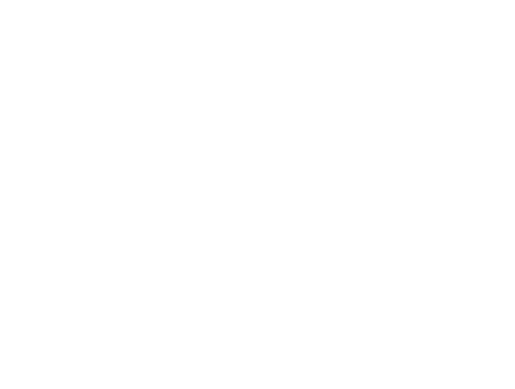

In [47]:
tree.plot_tree(clf,feature_names=X.columns,class_names=y.)

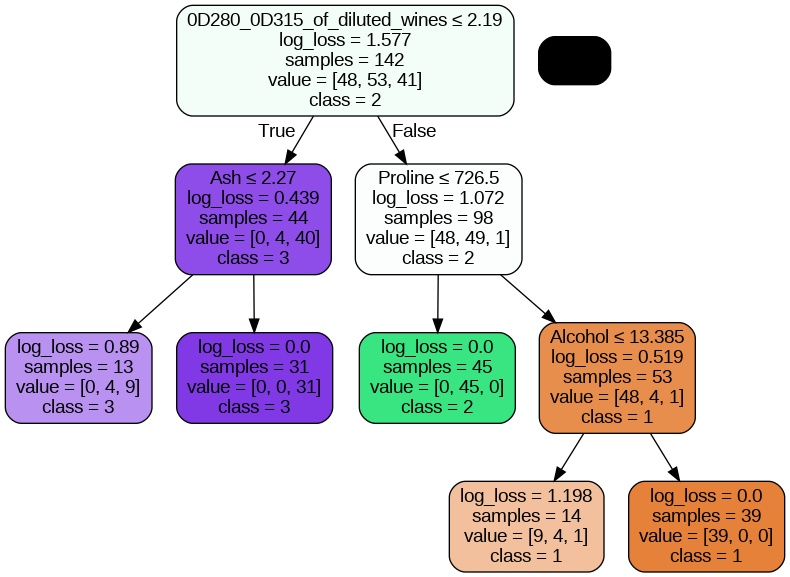

In [45]:
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns, class_names=['1','2','3'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('wine.png')
Image(graph.create_png())

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [34]:
X_train.head(7)

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
163,12.96,3.45,2.35,18.5,106,1.39,0.70,0.40,0.94,5.28,0.68,1.75,675
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
11,14.12,1.48,2.32,16.8,95,2.20,2.43,0.26,1.57,5.00,1.17,2.82,1280
168,13.58,2.58,2.69,24.5,105,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750
27,13.30,1.72,2.14,17.0,94,2.40,2.19,0.27,1.35,3.95,1.02,2.77,1285
95,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937
153,13.23,3.30,2.28,18.5,98,1.80,0.83,0.61,1.87,10.52,0.56,1.51,675


In [35]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=12, min_samples_split=2, min_samples_leaf=12,criterion='log_loss', random_state=7)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [36]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9166666666666666


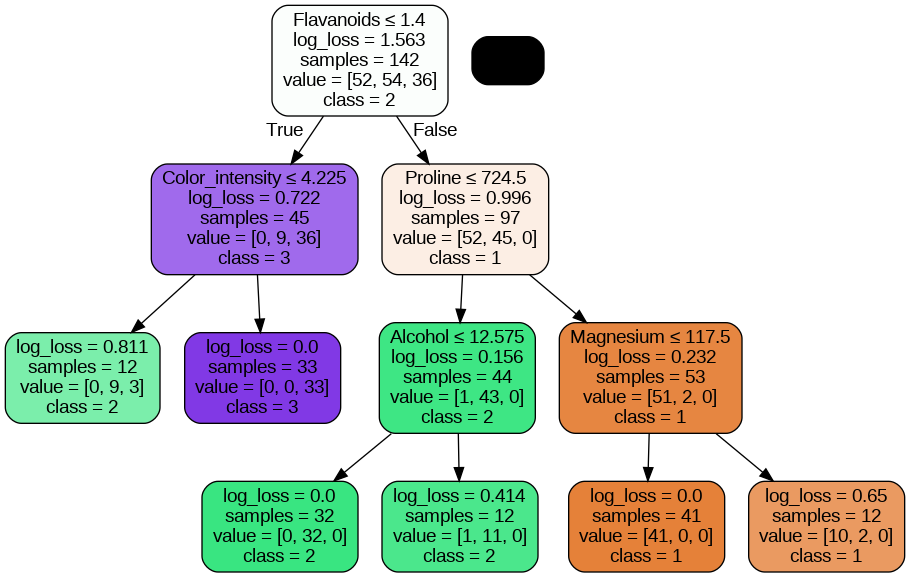

In [37]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns, class_names=['1','2','3'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('wine.png')
Image(graph.create_png())